In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN
from sklearn.model_selection import train_test_split

algorithm_globals.random_seed = 12345

In [4]:
thetas = ParameterVector("θ", length=21)
qubit_count = 3

In [5]:
kernel = QuantumCircuit(qubit_count)

for i in range(qubit_count):
    kernel.ry(thetas[7*i], i)
    kernel.rx(thetas[7*i+1], i)
    if i != qubit_count-1:
        kernel.crz(thetas[7*i+2],i,i+1)
        kernel.crx(thetas[7*i+3],i,i+1)
    else:
        kernel.crz(thetas[7*i+2],i,0)
        kernel.crx(thetas[7*i+3],i,0)
    kernel.rz(thetas[7*i+4],i)
    if i != qubit_count-1:
        kernel.cry(thetas[7*i+5],i,i+1)
    else:
        kernel.cry(thetas[7*i+5],i,0)
    kernel.rx(thetas[7*i+6],i)

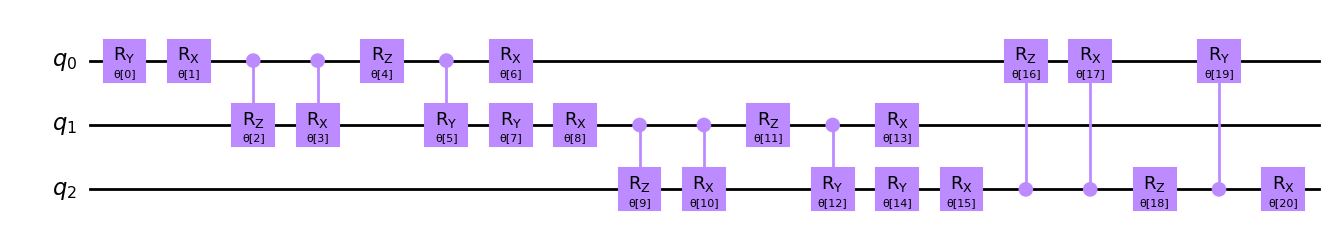

In [6]:
kernel.draw("mpl")

In [11]:
qubit_count = 5
thetas = ParameterVector("θ", length=2*qubit_count)

In [13]:
kernel = QuantumCircuit(qubit_count)

for i in range(qubit_count):
    kernel.x(i)
for i in range(qubit_count-1):
    kernel.ry(thetas[2*i], i)
    kernel.crx(thetas[2*i + 1],i, i+1)
kernel.ry(thetas[2*(qubit_count - 1)], i)
kernel.crx(thetas[2*(qubit_count - 1) + 1],qubit_count-1, 0)

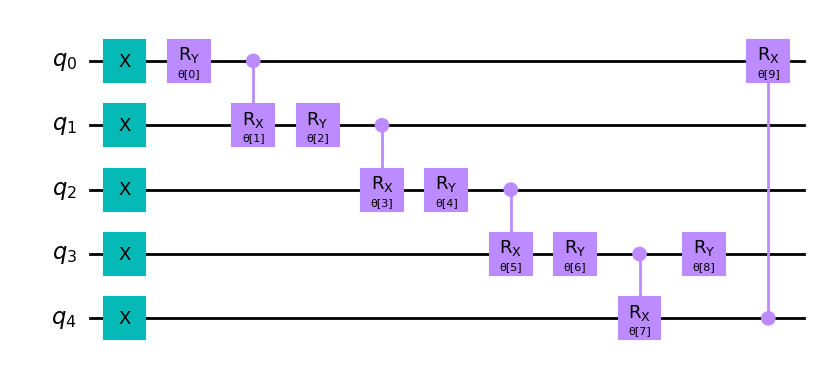

In [14]:
kernel.draw("mpl")